In [3]:
import matplotlib.pyplot as plt
from collections import Counter
from linear_algebra import distance
import re
import json
import numpy
from descartes import PolygonPatch

In [4]:
cities = [([12.491455 , 41.92680], "Python"), #Roma
          ([11.217041, 43.7710938], "Java"), #Firenze
          ([12.045135498, 44.220599591], "R"), #Forli
          ([14.2492675 , 40.84290], "Python"), #Napoli
          ([16.5962219, 38.90599569999], "Java"), #Catanzaro
          ([13.360748291015625 , 38.10754709314396], "Python"), #Palermo
          ([13.2989501953125, 37.81195385919268], "R"), #Corleone
          ([14.441528320312498, 35.88682489453265], "Java"), #Malta
          ([17.237548828125, 40.47202439692057], "R"), #Taranto
         ]

In [14]:
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     
    else:
        return majority_vote(labels[:-1])


def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points, 
                         key=lambda point: distance(point[0], new_point))

    k_nearest_labels = [label for _, label in by_distance[:k]]

    return majority_vote(k_nearest_labels)


def plot_state_borders(plt, color='0.0'):
    eojson = {}
    with open("gadm36_ITA_1.json", "r") as f:
        geojson = json.load(f)
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    ax = plt.gca() 
    for poly in geojson['geometries']:
        ax.add_patch(PolygonPatch(poly, alpha=15, zorder=10, fill=False, lw=2))
        ax.axis('scaled')

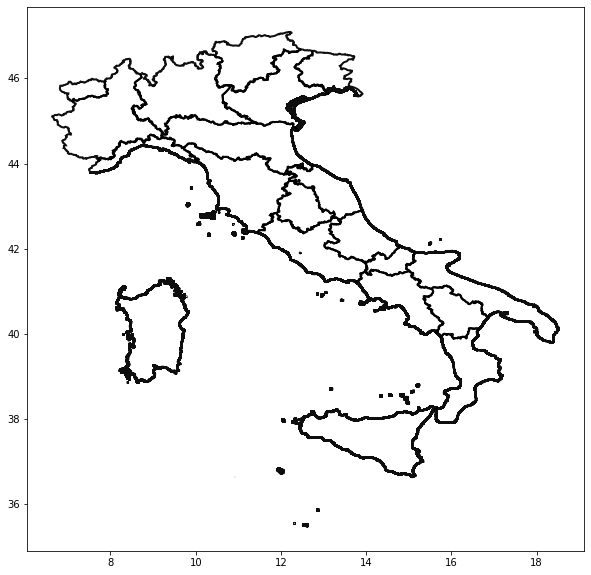

In [15]:
plots = { "Java" : ([], []), "Python": ([],[]), "R" : ([],[])}

markers = {"Java" : "o", "Python" : "s", "R" : "^"}
colors = {"Java" : "r", "Python" : "b", "R" : "g"}
plot_state_borders(plt)
for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

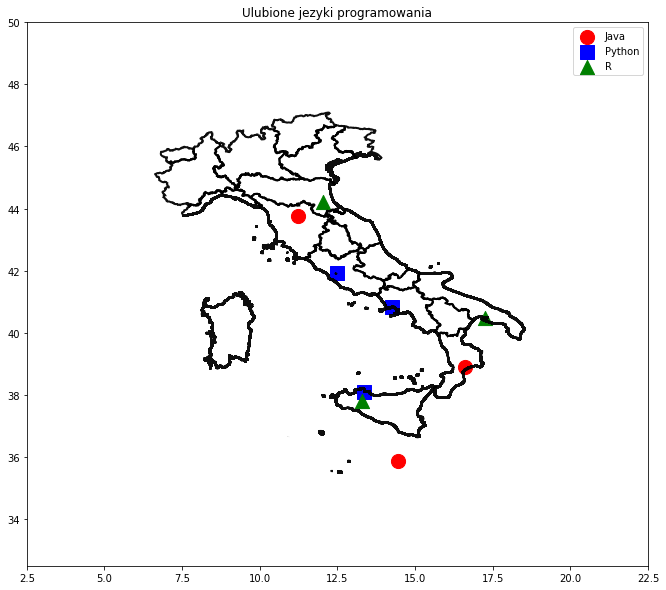

In [16]:
for language, (x,y) in plots.items():
    plt.scatter(x,y, color=colors[language], marker = markers[language],
               label = language, zorder=10, s=200)
    

plot_state_borders(plt)
plt.legend(loc=0)
plt.axis([2.5,22.5,32.5,50])
plt.title("Ulubione jezyki programowania")
plt.show()

In [ ]:
#plots = { "Java" : ([], []), "Python": ([],[]), "R" : ([],[])}

In [17]:
def renderMap(k):
    for longitude in numpy.arange(0, 23, 0.1):
        for latitude in numpy.arange(32,50, 0.1):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    for language, (x,y) in plots.items():
        plt.scatter(x,y, color=colors[language], marker = markers[language],
                   label = language, zorder=0)

    plot_state_borders(plt)

    plt.legend(loc=0)
    plt.axis([2.5,22.5,32.5,50])
    plt.title("k = " + str(k))
    plt.show()

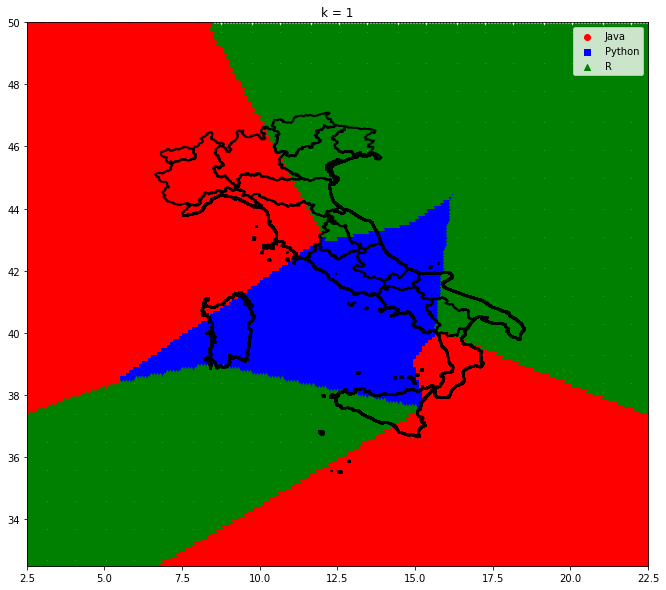

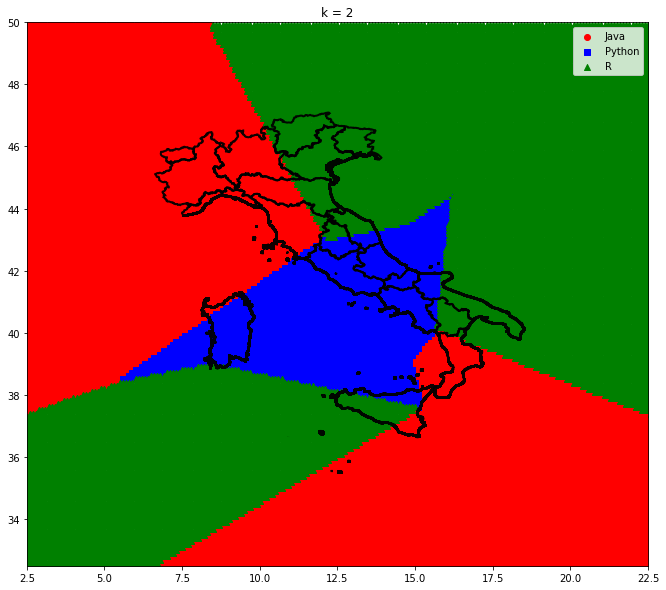

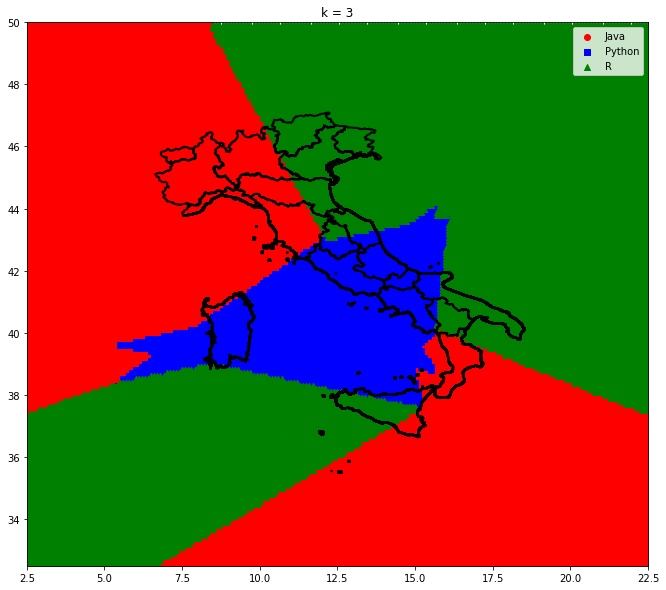

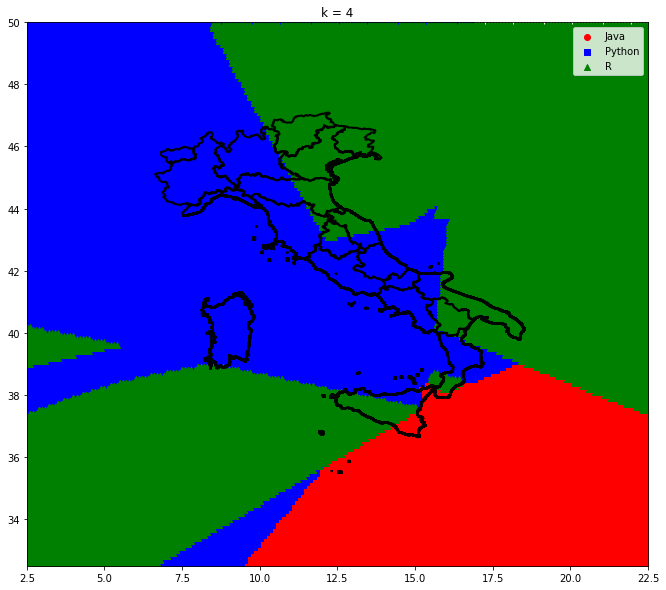

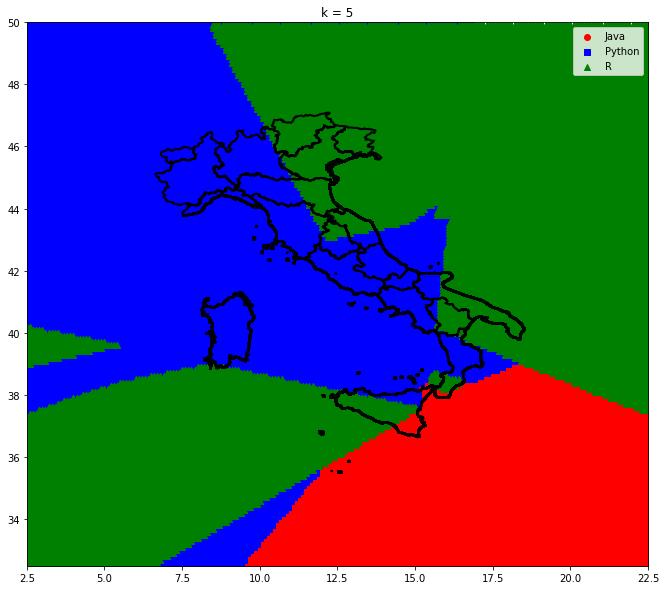

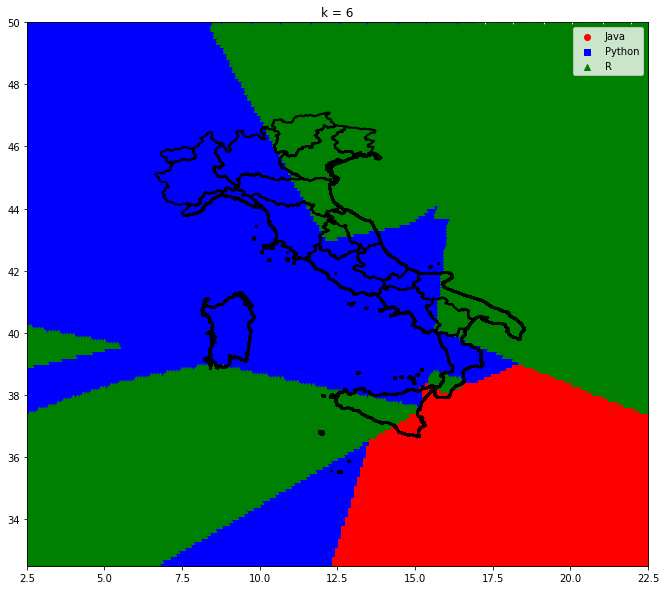

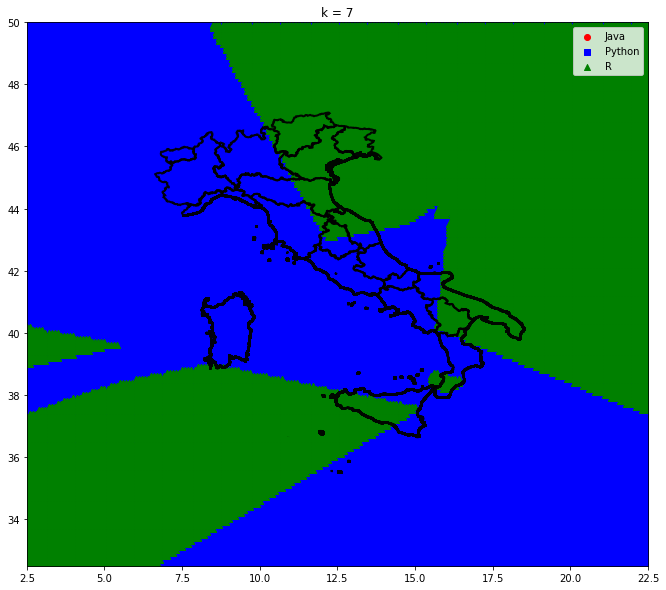

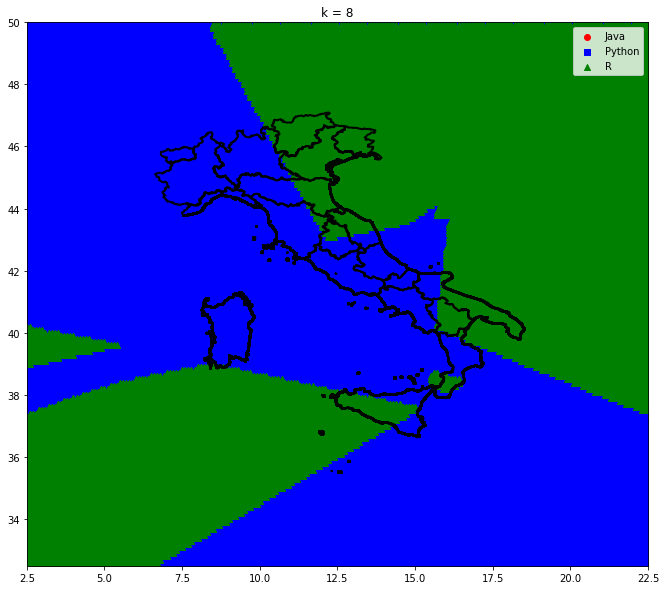

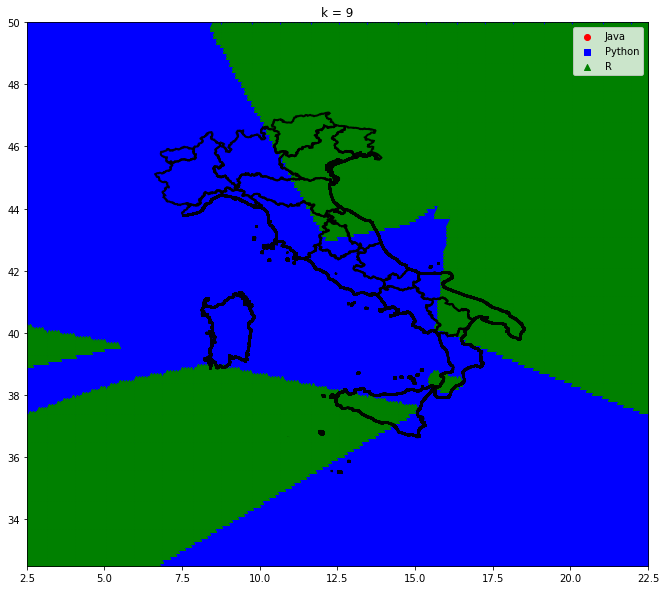

In [18]:
for k in range(1,10):
    renderMap(k)